In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
retail = pd.read_csv("retail_sales_dataset.csv")

In [3]:
df = retail.copy()

In [4]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [9]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [10]:
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [11]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [12]:
print(retail[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].mode())

   Age  Quantity  Price per Unit  Total Amount
0   43       4.0            50.0          50.0
1   64       NaN             NaN           NaN


The mode for age is 43,64. The mode for Quantity is 4, price per unit is 50, and total amount is 50.

TIME SERIES ANALYSIS

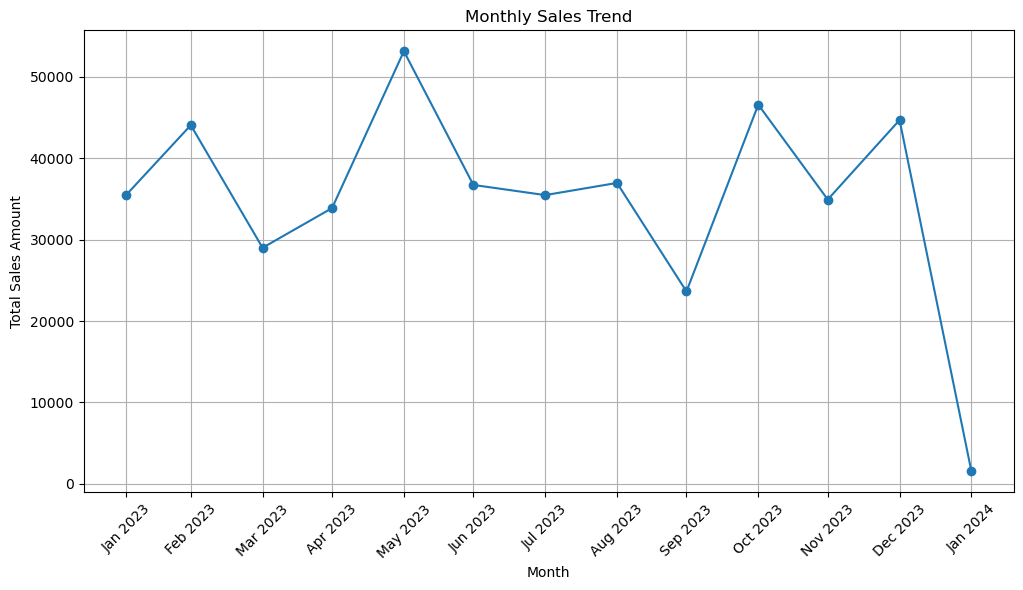

In [13]:
retail['Date']=pd.to_datetime(retail['Date'])
monthly_sales = retail.resample('M', on='Date')['Total Amount'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(ticks=monthly_sales.index, labels=[month.strftime('%b %Y') for month in monthly_sales.index], rotation=45)
plt.grid(True)
plt.show()

There was a significant slump in total sales in the month of September of 2023, while there was a significant rise in sales in the month of May of 2023.

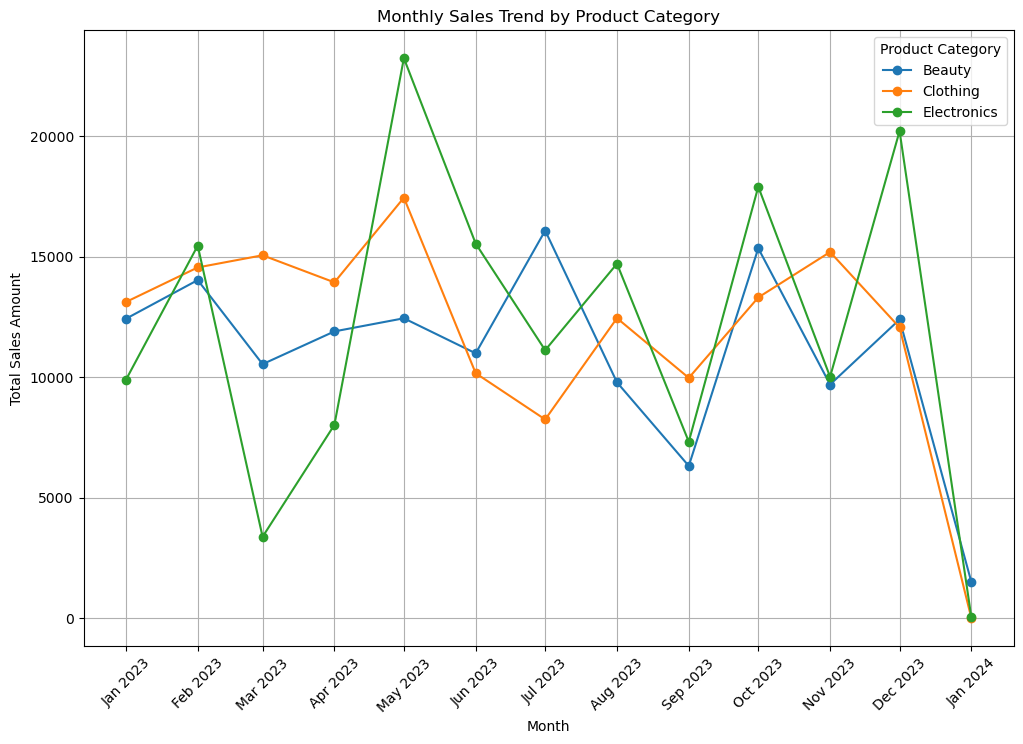

In [14]:
monthly_category_sales = retail.groupby([retail['Date'].dt.to_period('M'), 'Product Category'])['Total Amount'].sum().reset_index()

pivot_table = monthly_category_sales.pivot(index='Date', columns='Product Category', values='Total Amount').fillna(0)

plt.figure(figsize=(12, 8))
for category in pivot_table.columns:
    plt.plot(pivot_table.index.to_timestamp(), pivot_table[category], marker='o', label=category)  

plt.title('Monthly Sales Trend by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.legend(title='Product Category')
plt.grid(True)
plt.xticks(ticks=pivot_table.index.to_timestamp(), labels=[date.strftime('%b %Y') for date in pivot_table.index.to_timestamp()], rotation=45)
plt.show()

Maximum Sales-

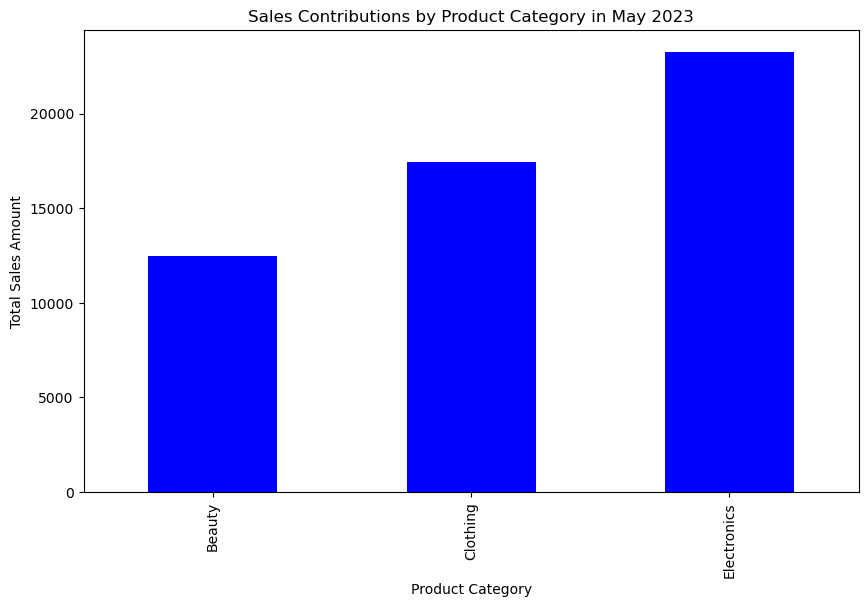

The total sales in the month of May is: 53150


In [15]:
start_date = '2023-05-01'
end_date = '2023-05-31'
data_may = retail[(retail['Date'] >= start_date) & (retail['Date'] <= end_date)]

category_sales_highest_month = data_may.groupby('Product Category')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
category_sales_highest_month.plot(kind='bar', color='blue')
plt.title('Sales Contributions by Product Category in May 2023')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()

total_sales_may = data_may['Total Amount'].sum()
print(f'The total sales in the month of May is: {total_sales_may}')


Electronics contributed the maximum sales amount in the max sales month

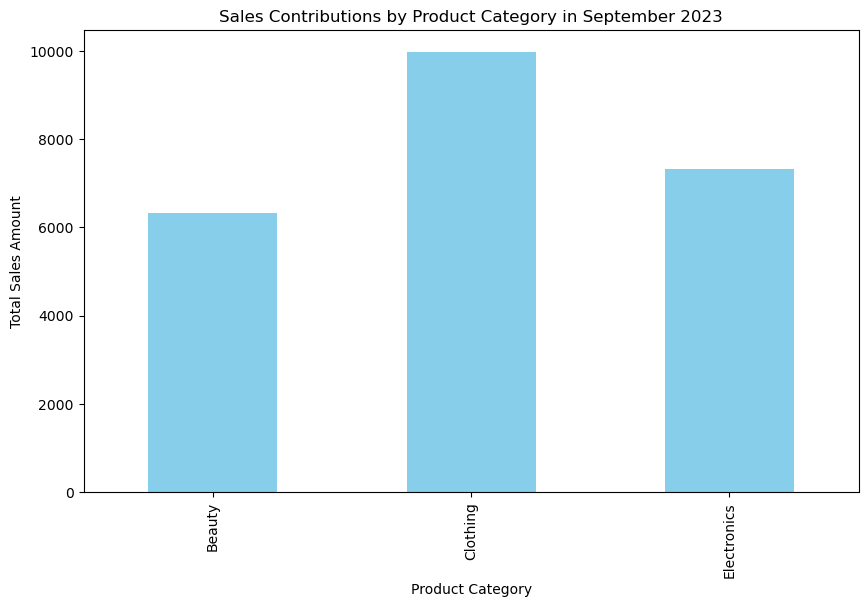

The total sales in the month of September is: 23620


In [16]:
start_date = '2023-09-01'
end_date = '2023-09-30'
data_september = retail[(retail['Date'] >= start_date) & (retail['Date'] <= end_date)]

category_sales_september = data_september.groupby('Product Category')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
category_sales_september.plot(kind='bar', color='skyblue')
plt.title('Sales Contributions by Product Category in September 2023')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()

total_sales_september = data_september['Total Amount'].sum()
print(f"The total sales in the month of September is: {total_sales_september}")

Beauty was sold the least in the least sold month.

In [17]:
date_count = retail['Date'].groupby(retail['Date']).count()
max_count_date = date_count.idxmax()
print(f"The date with the highest number of transactions is {max_count_date} with {date_count[max_count_date]} transactions.")

The date with the highest number of transactions is 2023-05-16 00:00:00 with 11 transactions.


Text(0.5, 1.0, 'Number of Transactions by Day')

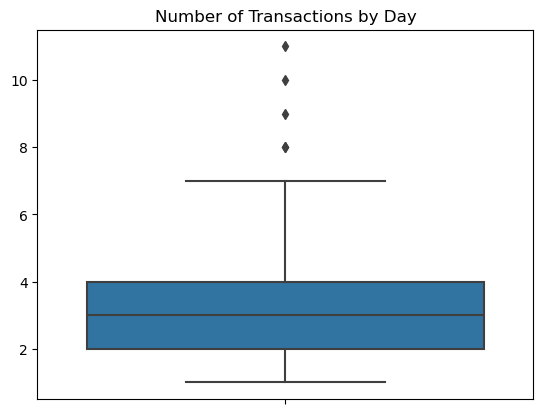

In [18]:
sns.boxplot(y=date_count.values).set_title('Number of Transactions by Day')

Since, majority of the transaction counts per day were falling between 2 and 4, the high number of transactions on 16th May was a significant outlier.

CUSTOMER AND PRODUCT ANALYSIS AND VISUALIZATION¶

<Axes: >

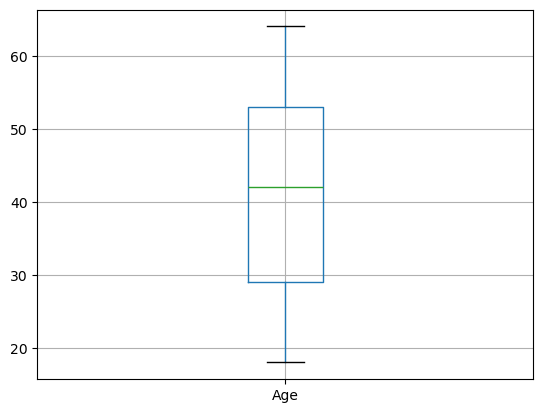

In [19]:
retail.boxplot(column='Age',showfliers=True)

The shoppers age distribution mostly lies between 29 and 53.

In [20]:
unique = retail['Product Category'].unique()
for category in unique:
  print(category)

Beauty
Clothing
Electronics


Text(0.5, 1.0, 'Age distribution by product category')

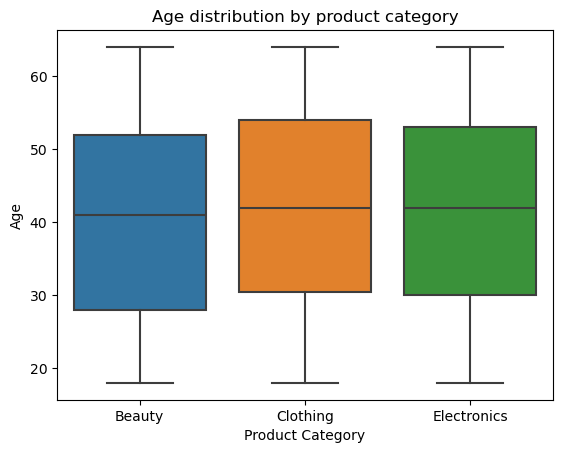

In [21]:
sns.boxplot(x=retail['Product Category'],y=retail['Age'],data=retail).set_title('Age distribution by product category')

The age distribution of the customers does not vary significantly based on the product category.

Text(0.5, 1.0, 'Age distribution by Gender')

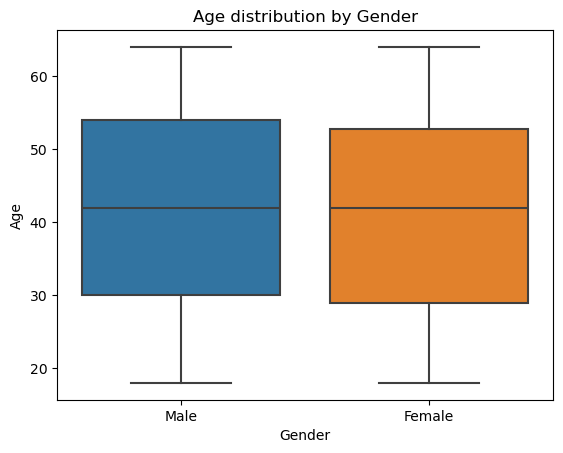

In [22]:
sns.boxplot(x=retail['Gender'],y=retail['Age'],data=retail).set_title('Age distribution by Gender')

The age distribution of the customers does not vary significantly based on the gender.

In [23]:
print("Number of records based on gender in percentage: ",retail['Gender'].value_counts()/len(retail['Gender']))

Number of records based on gender in percentage:  Gender
Female    0.51
Male      0.49
Name: count, dtype: float64


Number of transactions between male and female are evenly distributed, signifying that there is no gender preference observed in the purchasing history for the retail outlet.¶

In [24]:
print(retail['Total Amount'].max())
print(retail['Total Amount'].min())

2000
25


The minimum total transaction amount observed was 25 and the maximum observed was 2000.

array([<Axes: title={'center': 'Female'}>,
       <Axes: title={'center': 'Male'}>], dtype=object)

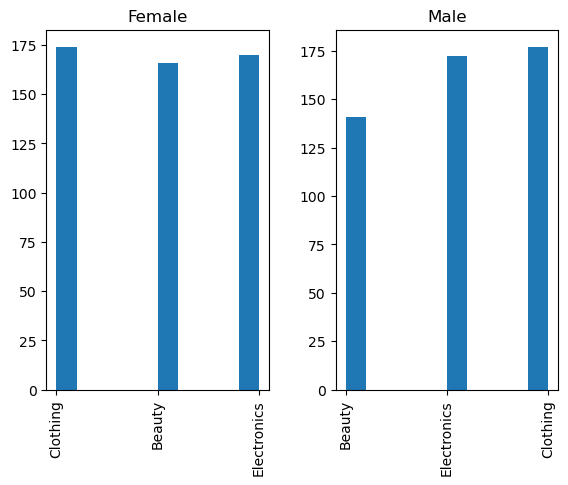

In [25]:
retail.hist(column='Product Category',by='Gender')

Female histogram shows that there is no significant preference of purchase between different product categories, while for male there is a significant lesser preference for beauty products.


<Axes: xlabel='Gender'>

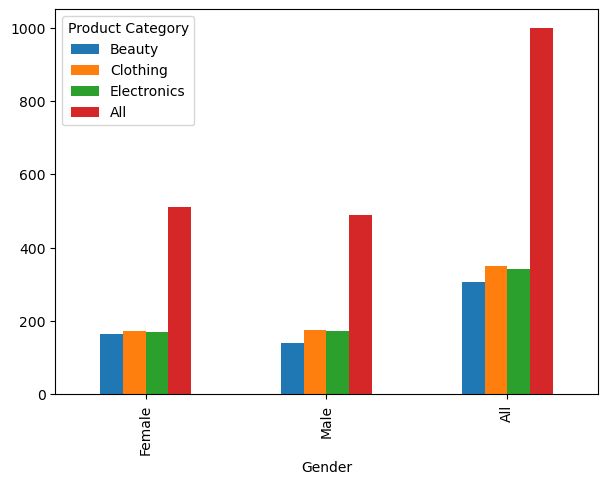

In [26]:
pd.crosstab(retail['Gender'],retail['Product Category'],margins=True).plot(kind='bar',figsize=(7,5))

This is another representation of the same inference.

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


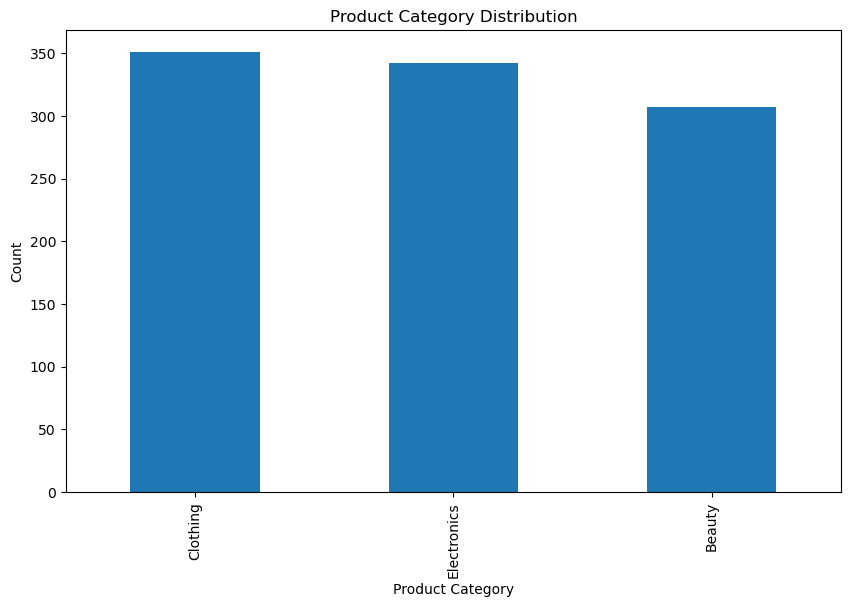

In [27]:
product_category_distribution = retail['Product Category'].value_counts()
print(product_category_distribution)

product_category_distribution.plot(kind='bar', figsize=(10, 6), title='Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

Here we can see that clothing products are sold more in terms of transactions and beauty products are transacted less, although there is no big difference between clothing and electronics both being transacted very high.

Gender
Female    510
Male      490
Name: count, dtype: int64


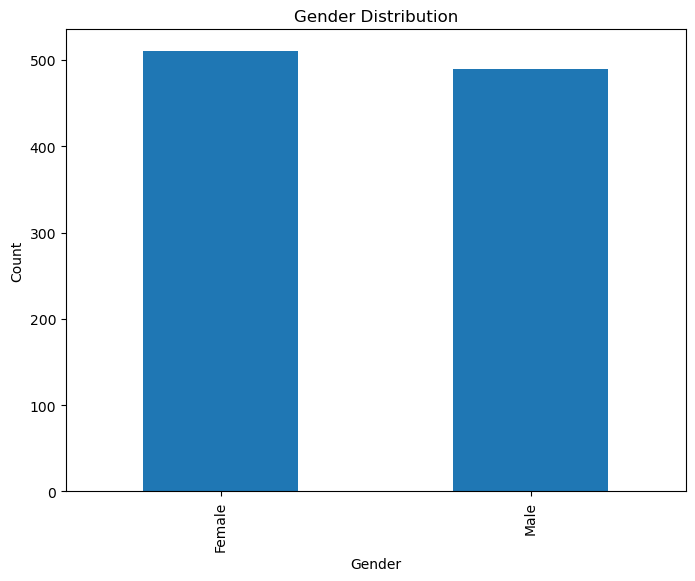

In [28]:
gender_distribution = retail['Gender'].value_counts()
print(gender_distribution)

gender_distribution.plot(kind='bar', figsize=(8, 6), title='Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

We can see that the count of male and female customers are almost the same, with the male edging the female 510 to 490. This is shown in the pie chart below.

Gender
Female    51.0
Male      49.0
Name: count, dtype: float64


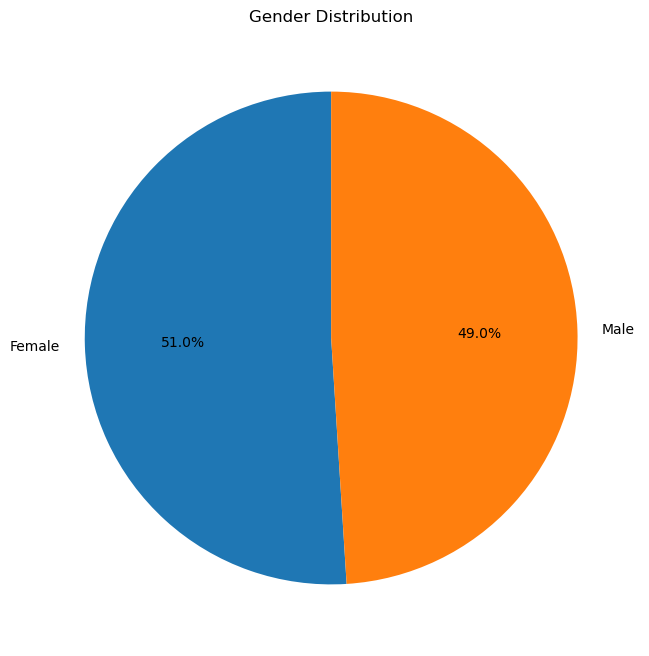

In [29]:
gender_distribution_percentage = (gender_distribution / gender_distribution.sum()) * 100
print(gender_distribution_percentage)

gender_distribution_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8), title='Gender Distribution')
plt.ylabel('')
plt.show()

This is the corresponding pie chart distinctly showing that there is no gender preference in the outlet.

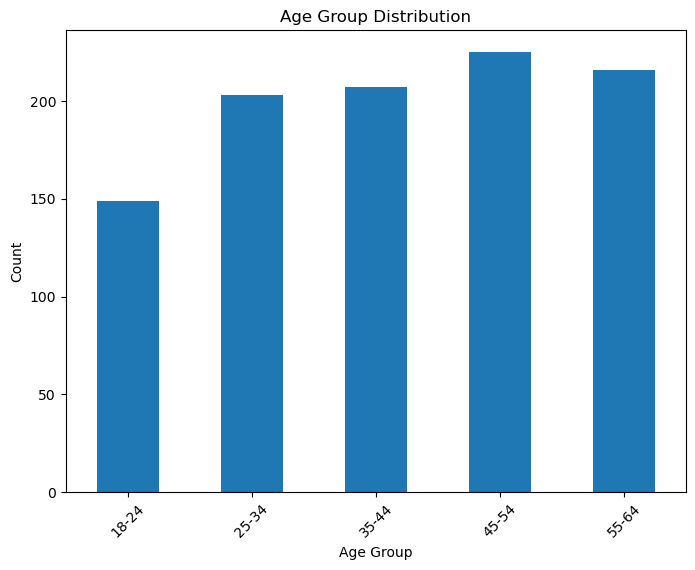

In [30]:
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
retail['Age Group'] = pd.cut(retail['Age'], bins=age_bins, labels=age_labels, right=False)

age_distribution = retail['Age Group'].value_counts().sort_index()

age_distribution.plot(kind='bar', figsize=(8, 6), title='Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

By observing the graph, we can see that the most shoppers are between the age groups 45-54, while the least are made by 18-24 year olds.

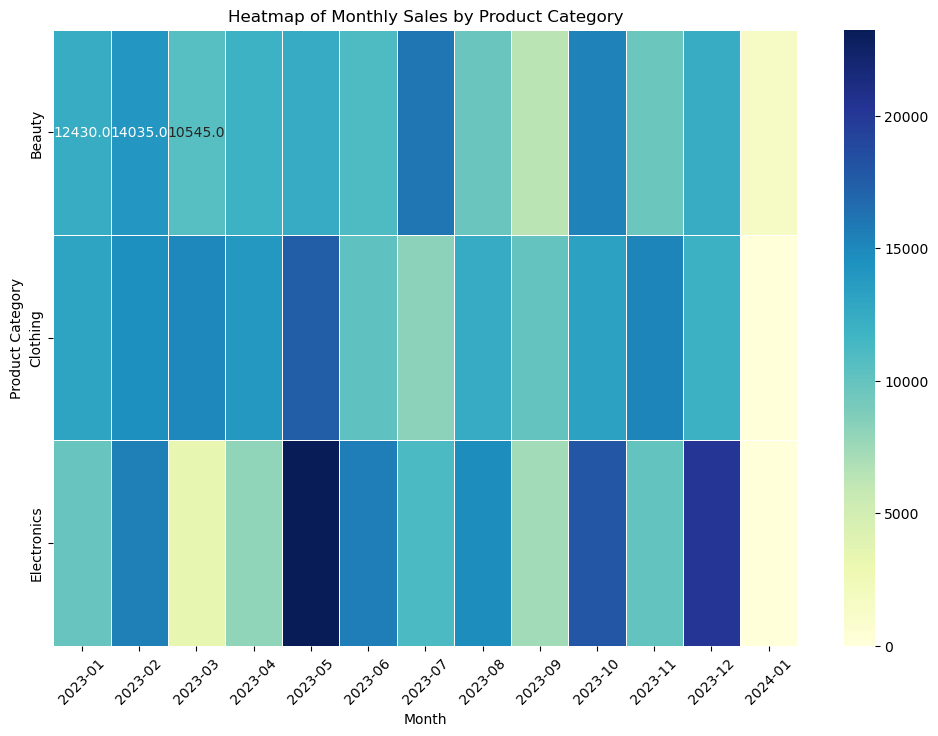

In [31]:
retail['Month'] = retail['Date'].dt.to_period('M')

pivot_table = retail.pivot_table(
    index='Product Category',
    columns='Month',
    values='Total Amount',
    aggfunc='sum',
    fill_value=0
)

# Heatmap of monthly sales
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Monthly Sales by Product Category')
plt.xlabel('Month')
plt.ylabel('Product Category')
plt.xticks(rotation=45)
plt.show()


Here we can see that in the month of May 2023, Electronics contributed the most on that month and also overall. Similarly, it contributed the least in the month of March 2023 if we exclude 2024.¶
Clothing showed a steady trend across the months, with July 2023 contributing the least and May the most. Beauty had the most sales in July and the least in September.


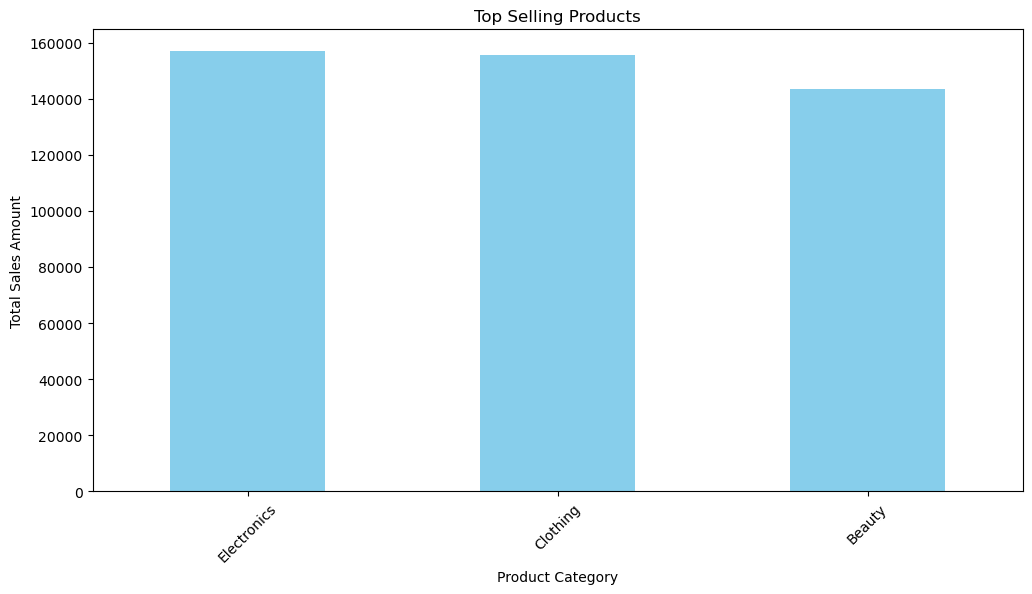

In [32]:
top_selling_products = retail.groupby('Product Category')['Total Amount'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_selling_products.plot(kind='bar', color='skyblue')
plt.title('Top Selling Products')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()


Here, Electronics generated the most revenue followed by clothing although not significantly by a large difference, and Beauty generated the least revenue of the three.

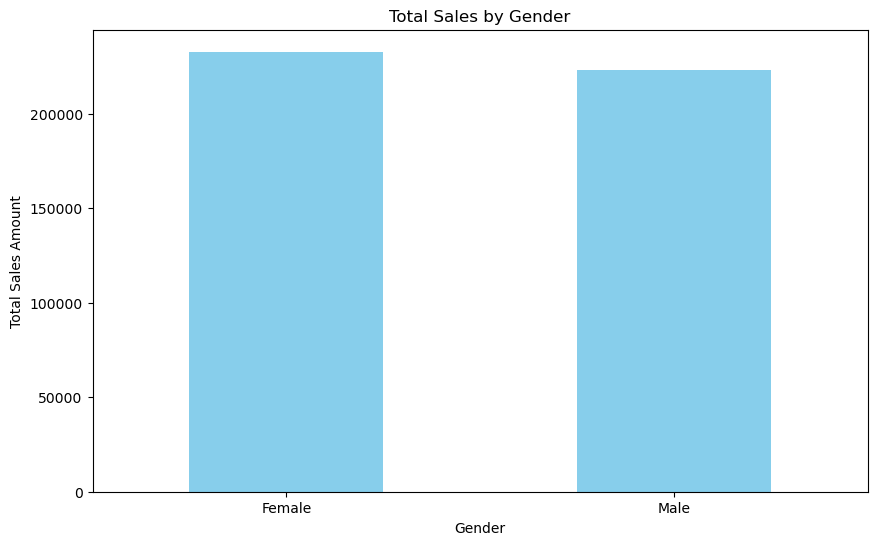

In [33]:
gender_sales = retail.groupby('Gender')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
gender_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=0)
plt.show()

This suggests that females spend a lot as compared to males.

C:\Users\aishw\AppData\Local\Temp\ipykernel_20248\756849418.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_product_sales = retail.groupby(['Age Group', 'Product Category'])['Total Amount'].sum().unstack()


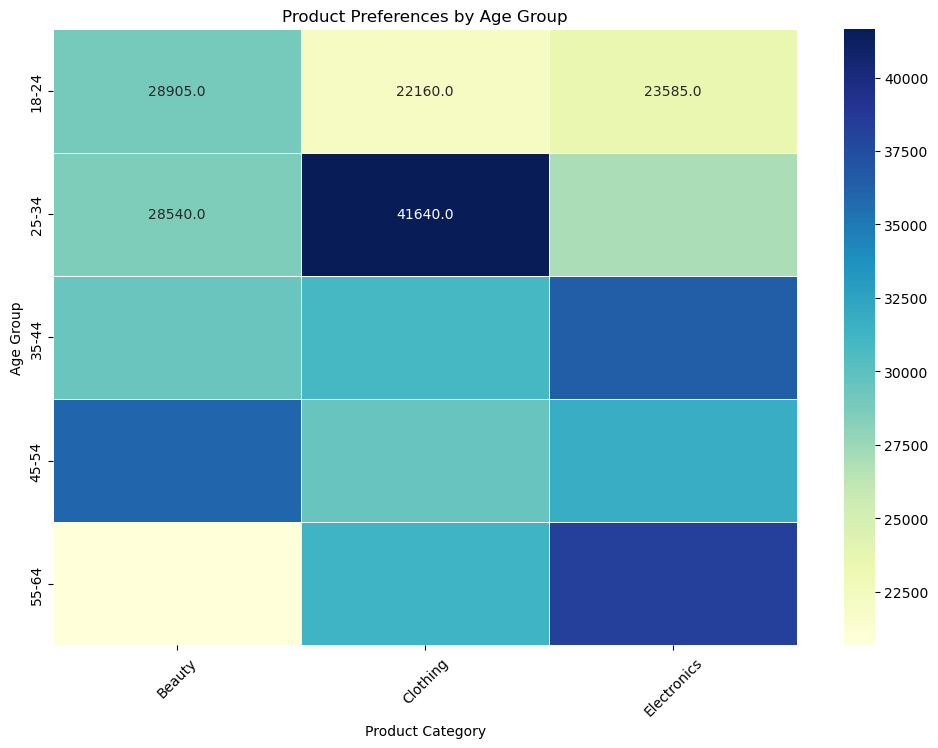

In [34]:
age_group_product_sales = retail.groupby(['Age Group', 'Product Category'])['Total Amount'].sum().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(age_group_product_sales, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Product Preferences by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.show()

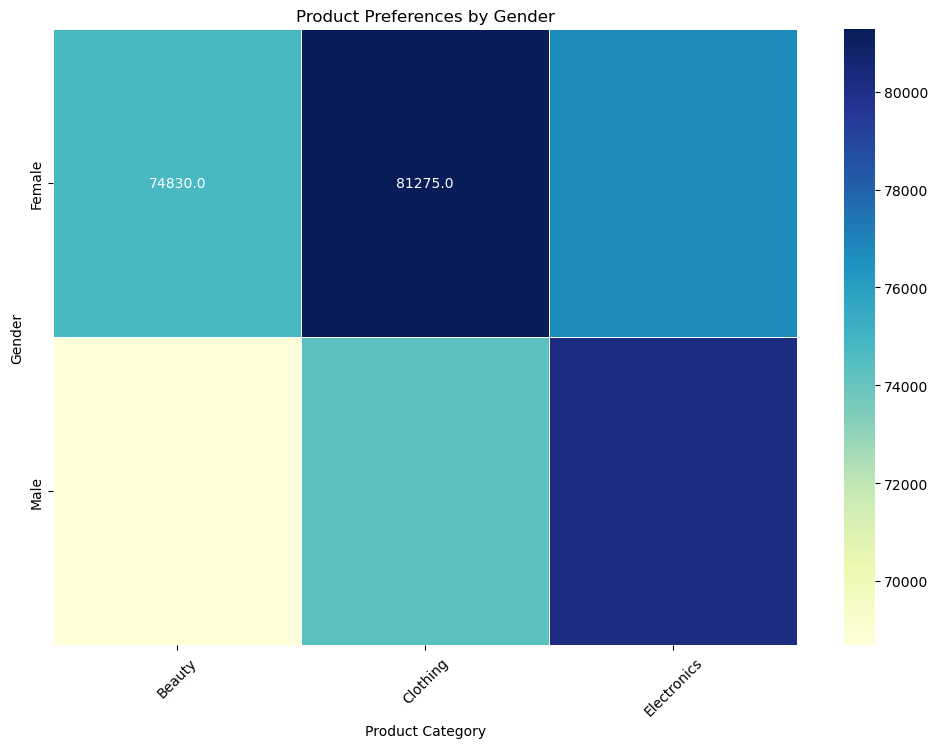

In [35]:
gender_product_sales = retail.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(gender_product_sales, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Product Preferences by Gender')
plt.xlabel('Product Category')
plt.ylabel('Gender')
plt.xticks(rotation=45)
plt.show()

Here, females spend the most on Clothing products and the least on Beauty while males spend most on Electronics and least on Beauty products.

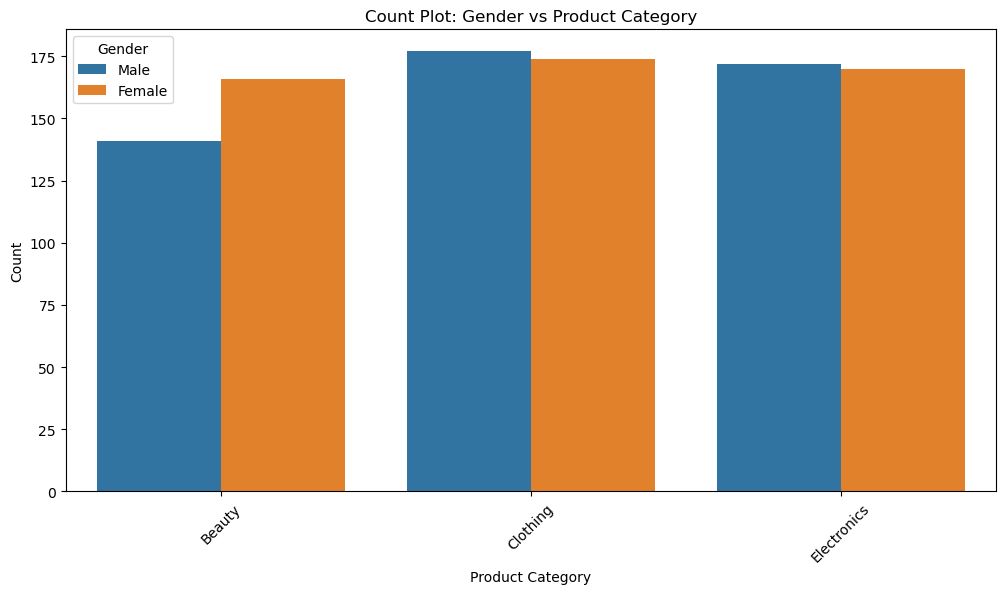

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(data=retail, x='Product Category', hue='Gender')
plt.title('Count Plot: Gender vs Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


Here, males buy clothing products more frequently as compared to females. Females buy more beauty products as compared to males in terms of frequency.

C:\Users\aishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


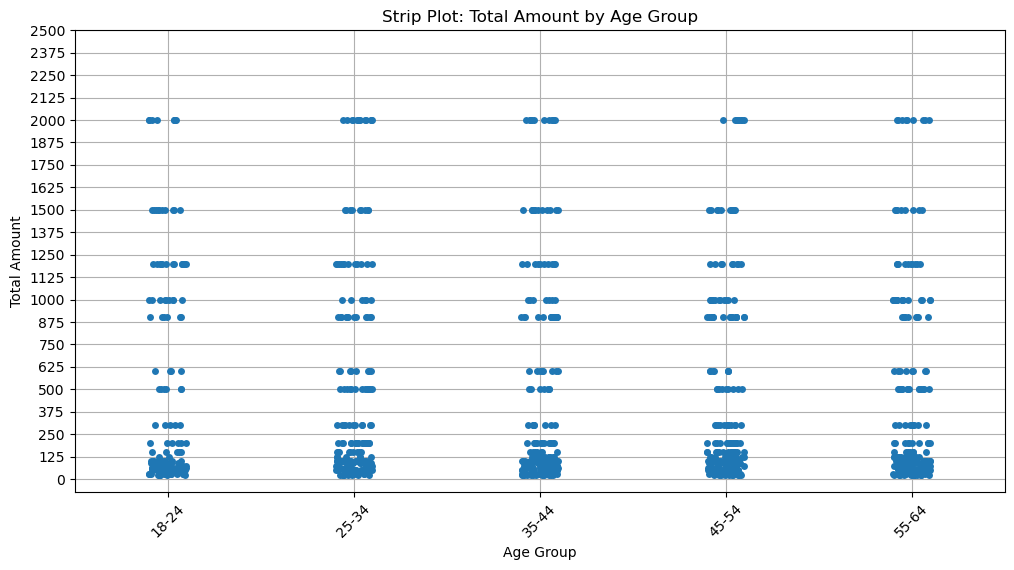

In [37]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=retail, x='Age Group', y='Total Amount', jitter=True)
plt.title('Strip Plot: Total Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.grid(True)
plt.yticks(range(0,2501,125))
plt.xticks(rotation=45)
plt.show()

C:\Users\aishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


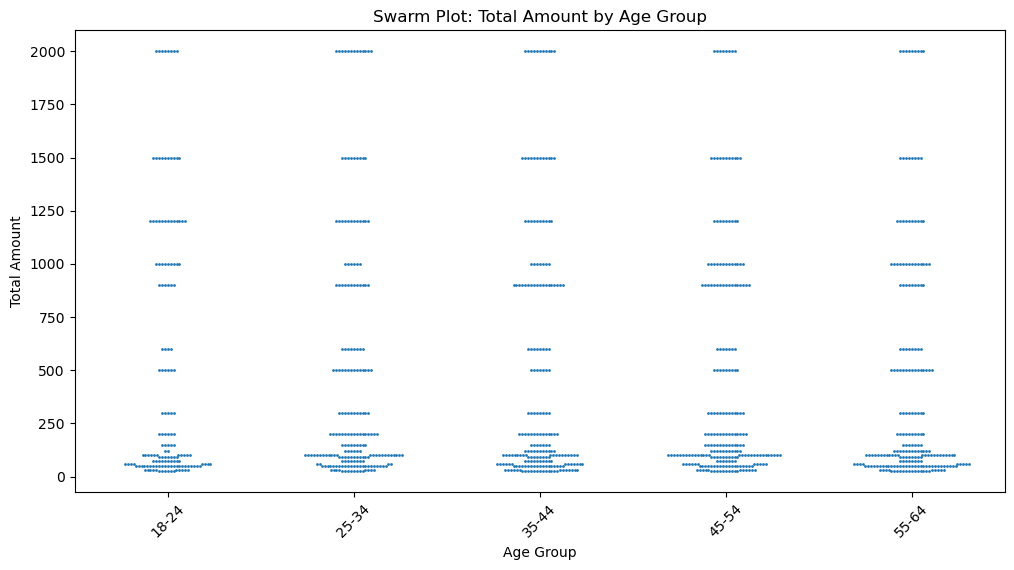

In [38]:
plt.figure(figsize=(12, 6))
sns.swarmplot(data=retail, x='Age Group', y='Total Amount',size=2)
plt.title('Swarm Plot: Total Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

C:\Users\aishw\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\aishw\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


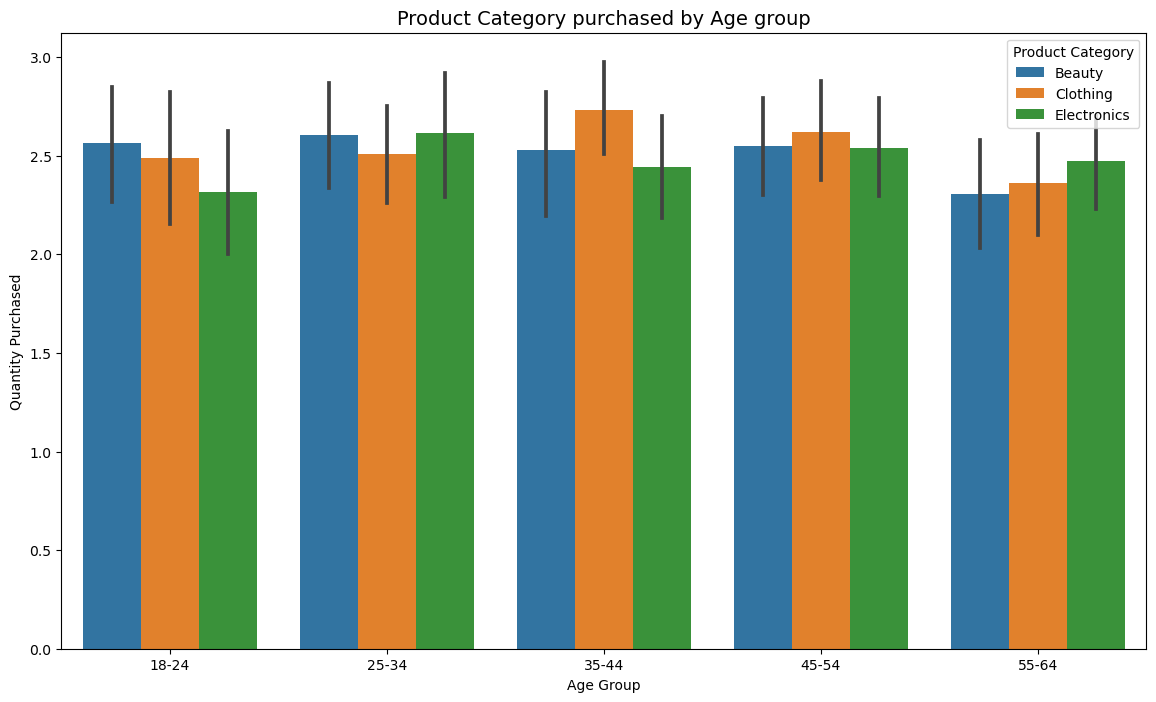

In [39]:
plt.figure(figsize=(14,8))
sns.barplot(x='Age Group', y='Quantity', hue= 'Product Category', data=retail)
plt.title('Product Category purchased by Age group', fontsize=14)
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Quantity Purchased', fontsize=10)
plt.show()

For age group 18-24, Beauty products are more dominant as compared to Clothing and Electronics. Similarly, for age group 25-34, Beauty and Electronics are both equally bought and more than Clothing.m

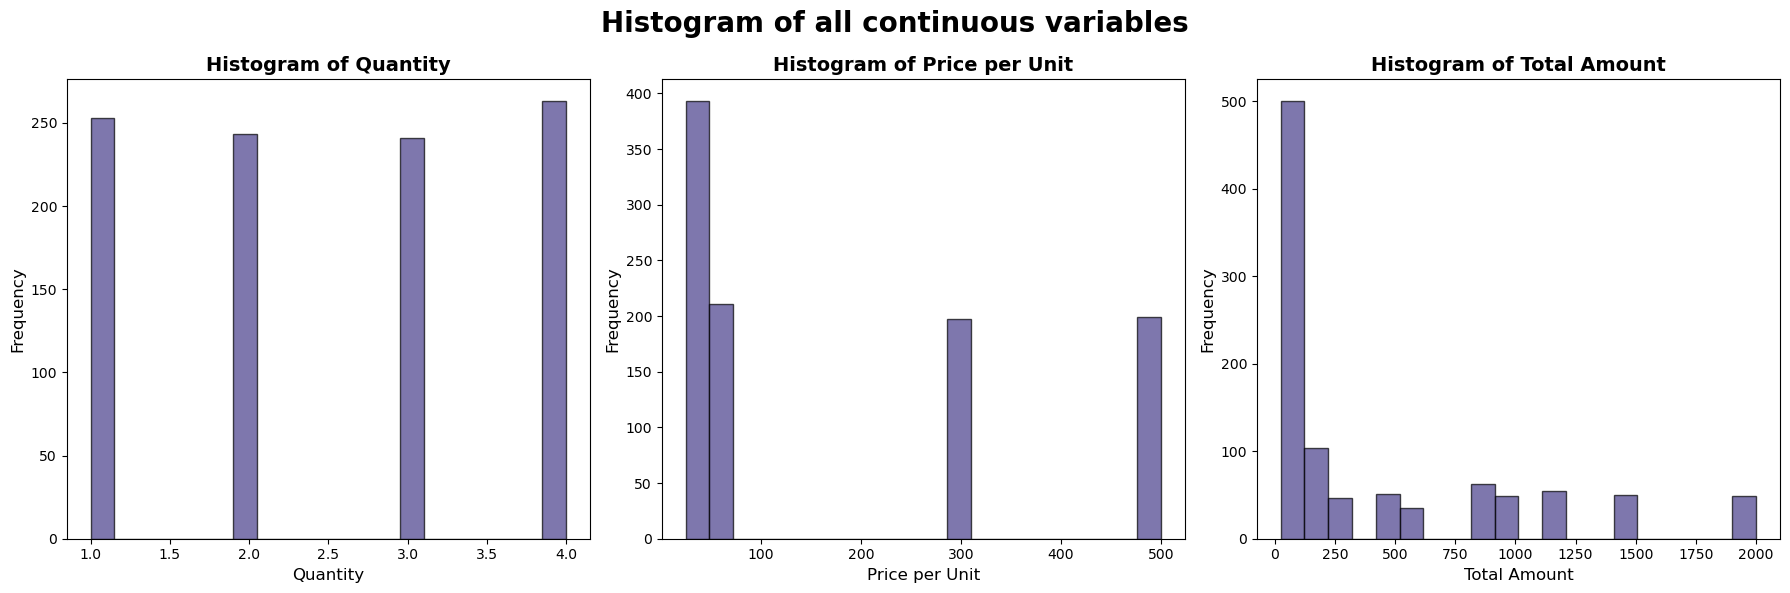

In [41]:
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.hist(retail['Quantity'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
plt.title('Histogram of Quantity', fontsize=14, fontweight='bold')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(132)
plt.hist(retail['Price per Unit'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
plt.title('Histogram of Price per Unit', fontsize=14, fontweight='bold')
plt.xlabel('Price per Unit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(133)
plt.hist(retail['Total Amount'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
plt.title('Histogram of Total Amount', fontsize=14, fontweight='bold')
plt.xlabel('Total Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.suptitle('Histogram of all continuous variables', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

We can see that products in the range of 0-100 unit price are bought more frequently than other price ranges. Similarly, products which are bought as total price of about 150-200 are most frequently bought.

In [42]:
cutoff_date = pd.to_datetime('2024-06-30')
retail_cutoff = retail[retail['Date'] < cutoff_date]
retail_cutoff_sorted = retail_cutoff.sort_values(by='Total Amount', ascending=False)
print(retail_cutoff_sorted[['Customer ID','Total Amount','Product Category']].head(5))

    Customer ID  Total Amount Product Category
571     CUST572          2000         Clothing
88      CUST089          2000      Electronics
502     CUST503          2000           Beauty
560     CUST561          2000         Clothing
831     CUST832          2000           Beauty


The top 5 customers by total amount who have not purchased in the past 6 months are printed above with their preferred product categories.

They are potential customer churn risks. They can be targeted for personalized marketing with their preferred product categories